Copyright (c) 2020 Nikita Kulikov - MIT Licensed

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

There are points $\vec{x}_i \in \mathbb{R}^{d}$. Lets take a look on distribution of points along one axis: $x_{ij}$ and also assume normalization $x_{ij} \in [-1, 1]$.

We have density distribution in the following form:
$$
    \rho_j(x) = \sum_i \delta(x - x_{ij})
$$
Thus we can compute fourier of this function:
$$
    r_j(k) = \int_{-1}^{1} dx e^{-ikx} \sum_i \delta(x-x_{ij}) = \sum_i e^{-ikx_{ij}},~k=\pi n
$$


In [3]:
nx = 1000000
xs = 2 * np.random.rand(nx) - 1
ys = np.random.rand(nx)
fs = np.exp(-4 *(xs-0.9)**2) + np.exp(-100*(xs+0.9)**2) + np.exp(-50*(xs+0.3)**2)
#fs = 1 + 0.25 * np.sin(2 * np.pi * xs) + 0.1 * np.cos(7 * np.pi * xs)
zs = xs[ys < fs]
nz = zs.shape[0]

In [4]:
med = np.median(zs)
med

0.38372418136199493

In [5]:
mean = np.mean(zs)
mean

0.15433341302154605

(477071, 250) (250, 477071)


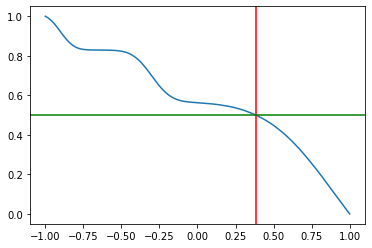

In [6]:
vnz = 250
vxs = np.linspace(-1, 1, vnz)
vx = np.broadcast_to(vxs, (nz, vnz))
vz = np.broadcast_to(zs, (vnz, nz))
print(vx.shape, vz.shape)
vl = np.sum(vx.T < vz, axis = 1)
vm = np.max(vl)
plt.plot(vxs, vl / vm)
plt.axvline(med, color = 'r')
plt.axhline(0.5, color = 'g')

In [7]:
vl[vnz // 2] / vm - 0.5

0.0622580286791693

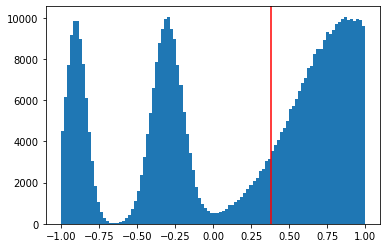

In [8]:
_ = plt.hist(zs, bins = 100)
plt.axvline(med, color = 'r')

In [9]:
nk = 200
ks = np.pi * np.arange(-nk, nk + 1) / 2
nks, nxs = ks.shape[0], zs.shape[0]
sk = np.broadcast_to(ks, (nxs, nks))
fm = zs[:, np.newaxis] * sk
fi = np.sum(np.exp(-1j * fm), axis = 0)
fp = np.concatenate((fi[nk:], fi[:nk]))

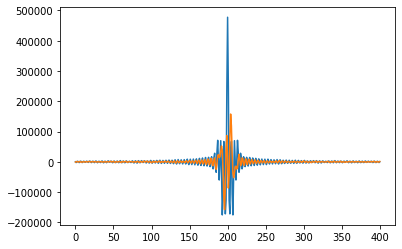

In [10]:
plt.plot(np.real(fi))
plt.plot(np.imag(fi))

In [11]:
fx = np.linspace(-2, 2, nks)
fr = np.fft.ifft(fp)
fy = np.concatenate((fr[nk:], fr[:nk]))

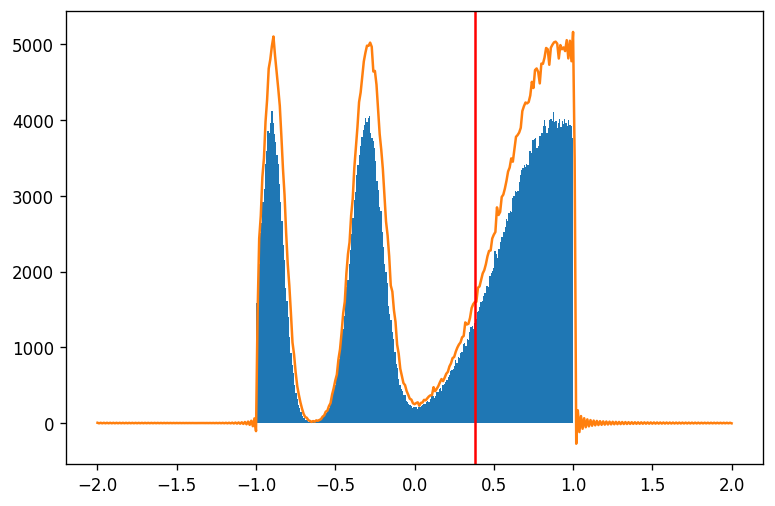

In [12]:
plt.figure(figsize = (7.5, 5), dpi = 120)
_ = plt.hist(zs, bins = 250)
plt.plot(fx, np.real(fy))
plt.axvline(med, color = 'r')

We can use theta function:
$$
    \text{sign}(x) \rightarrow \frac{i}{k \sqrt{2\pi}}=S
$$
To prove it:
$$
    \text{sign}(x) \rightarrow \int_{0}^{1}e^{-ikx}dx - \int_{-1}^{0}e^{-ikx}dx = i \left. \frac{e^{-ikx}}{k} \right\vert_{0}^{1} - i \left. \frac{e^{-ikx}}{k} \right\vert_{-1}^{0} = i\frac{e^{-ik} + e^{ik} - 2}{k}
$$

Thus we can write for any function $f$ with fourier image $F$:
$$
    \int_{-1}^{1} f(x) \text{theta}(x - y) dx = \int_{-1}^{y} f(x) dx
$$

For non-negative point's distribution median point $m$ is defined as:
$$
    \int_{-1}^{m} f(x) dx = \int_{m}^{1} f(x) dx 
$$
Or:
$$
    \int_{-1}^{1} f(x) \text{sign}(m-x) dx = 0
$$

It can be interpreted as convolution and due to fourier properties:
$$
    (f*\text{sign})(m) \rightarrow F(k) \cdot S(k)
$$

In [13]:
# Zeero division should be handled by zero substitution
ft = 1j * (np.exp(-2j * ks) + np.exp(+2j * ks) - 2.) / ks
ft[nk] = 0
fj = np.exp(-1j * fm)
fl = np.sum(fj, axis = 0)
fi = fl * ft
fp = np.concatenate((fi[nk:], fi[:nk]))

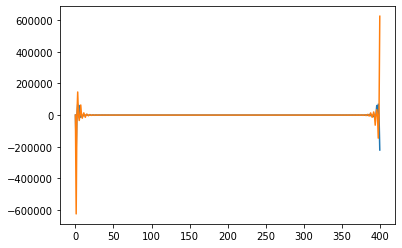

In [14]:
plt.plot(np.real(fp))
plt.plot(np.imag(fp))

In [15]:
fx = np.linspace(-2, 2, nks)
fr = np.fft.ifft(fp)
fy = np.concatenate((fr[nk:], fr[:nk]))

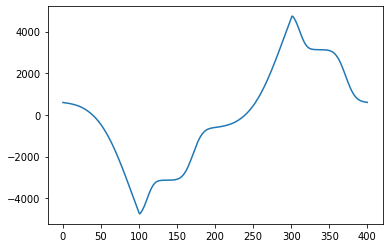

In [16]:
fm = np.max(np.real(fy))
plt.plot(np.real(fy))

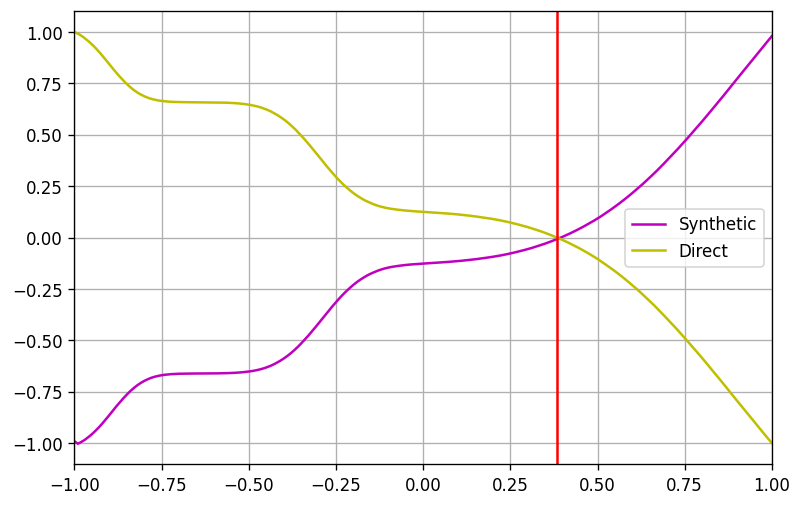

In [17]:
plt.figure(figsize = (7.5, 5), dpi = 120)
plt.xlim(-1, 1)
fm = np.max(np.real(fy))
fnx = np.linspace(-2, 2, 2 * nk + 1)
plt.plot(fnx, np.real(fy) / fm, color = 'm', label = 'Synthetic')
plt.plot(vxs, 2 * vl / vm - 1, color = 'y', label = 'Direct')
plt.axvline(med, color = 'r')
plt.grid()
plt.legend()

0.385

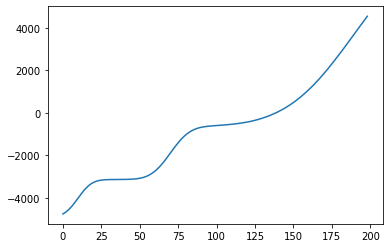

In [18]:
vals = np.real(fy)[nk // 2 + 1 : 3 * nk // 2]
crds = fnx[nk // 2 + 1 : 3 * nk // 2]
plt.plot(vals)
idxs = np.argwhere(np.sign(vals[:-1]) != np.sign(vals[1:]))
#It is guaranteed
assert len(idxs) == 1
idx = int(idxs)
(crds[idx]+crds[idx-1])/2

The overall complexity is:
$$
    O(\underbrace{d \cdot N_{s} \cdot N_{k}}_\text{Fourier transform} + \underbrace{N_{k} + d \cdot N_{k}}_\text{Convolution} + 
    \underbrace{d \cdot N_{k} \cdot \log_2 N_{k}}_\text{Inverse Fourier})
$$